In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir_path = "/content/drive/MyDrive/dataset/veg-dataset"

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
classes = os.listdir(dir_path)
print(classes)

['.ipynb_checkpoints', 'test-set', 'train-set', 'vegetable.h5']


In [ ]:
dir_path = "/content/drive/MyDrive/dataset/veg-dataset/train-set"
classes = os.listdir(dir_path)
print(classes)

['Pepper,_bell___Bacterial_spot', '.ipynb_checkpoints', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']


In [ ]:
dir_path = "/content/drive/MyDrive/dataset/veg-dataset/test-set"
classes = os.listdir(dir_path)
print(classes)

['Pepper,_bell___Bacterial_spot', '.ipynb_checkpoints', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']


In [ ]:
train = "/content/drive/MyDrive/dataset/veg-dataset/train-set" 
test = "/content/drive/MyDrive/dataset/veg-dataset/test-set"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 9016 images belonging to 10 classes.
Found 3241 images belonging to 10 classes.


In [ ]:
model=Sequential()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/dataset/veg-dataset/vegetable.h5')

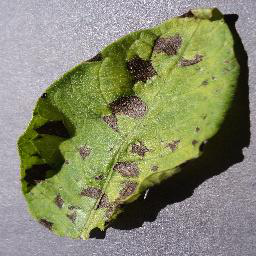

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/train-set/Potato___Early_blight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG")
img

In [ ]:
x=image.img_to_array(img)

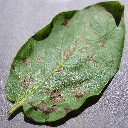

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/train-set/Potato___Early_blight/1b4304a9-88c2-4c09-bfea-830fa162a35a___RS_Early.B 7188.JPG",target_size=(128,128))
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[180., 179., 193.],
        [185., 184., 198.],
        [175., 174., 188.],
        ...,
        [193., 201., 188.],
        [199., 199., 207.],
        [195., 191., 216.]],

       [[176., 175., 189.],
        [177., 176., 190.],
        [178., 177., 191.],
        ...,
        [189., 194., 198.],
        [198., 197., 215.],
        [199., 194., 224.]],

       [[177., 176., 190.],
        [174., 173., 187.],
        [169., 168., 182.],
        ...,
        [198., 200., 215.],
        [198., 199., 220.],
        [192., 189., 216.]],

       ...,

       [[133., 130., 141.],
        [142., 139., 150.],
        [139., 136., 147.],
        ...,
        [181., 179., 193.],
        [151., 149., 163.],
        [162., 160., 174.]],

       [[151., 148., 159.],
        [133., 130., 141.],
        [140., 137., 148.],
        ...,
        [160., 158., 172.],
        [160., 158., 172.],
        [150., 148., 162.]],

       [[129., 126., 137.],
        [160., 157., 168.],
        [146., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 498ms/step


In [ ]:
x_train.class_indices

{'.ipynb_checkpoints': 0,
 'Pepper,_bell___Bacterial_spot': 1,
 'Pepper,_bell___healthy': 2,
 'Potato___Early_blight': 3,
 'Potato___Late_blight': 4,
 'Potato___healthy': 5,
 'Tomato___Bacterial_spot': 6,
 'Tomato___Late_blight': 7,
 'Tomato___Leaf_Mold': 8,
 'Tomato___Septoria_leaf_spot': 9}

In [ ]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato__Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [ ]:
index[y[0]]

'Potato___Early_blight'

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/train-set/Tomato___Septoria_leaf_spot/0cba2d69-c73b-472b-9fc1-beca9b3f02a0___JR_Sept.L.S 8369.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

1/1 [==============================] - 0s 47ms/step


In [ ]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 3241 images belonging to 10 classes.
